Please follow the steps below to complete your assignment:
1. You need to download ‘breast cancer wisconsin’ data using the library Scikit learn; ref is given
below. [2]
2. Remove the missing/infinite values using the mean strategy if required. [3]
3. Visualize the data in 2-D scatter plot and write the inferences, How the data look like. [5]
4. Make a boxplot for each feature and highlight the outlier, if any, then remove the outlier, make
again box plot to show the outlier effect and write the inferences. [5]
5. Normalized the data if required, and write a note for what, why and how you performed
normalization.[5]<br>
Ref:
<br>
1. https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer

In [1]:
# importing necessary libraries

import pandas as pd
import numpy as np
import sklearn
from scipy import stats
import pyforest
from sklearn.datasets import load_breast_cancer
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

### 1. You need to download ‘breast cancer wisconsin’ data using the library Scikit learn; ref is given below.

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer

In [2]:
# Loading the breast cancer dataset from sklearn

df = load_breast_cancer()
df1 = pd.DataFrame(df.data, columns=df.feature_names)
df2 = pd.DataFrame(df.target, columns=["Result"])
df3 = pd.concat([df1,df2], axis = 1)
df3.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  Result  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  
3          0.6638                  0.17300       0  
4          0.2364                  0.07678       0  

[5 rows x 31 columns]

To check the count of malignant & benign cases.

In [3]:
df3["Result"].value_counts()

1    357
0    212
Name: Result, dtype: int64

In [4]:
# checking datatype of columns before plotting

df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [5]:
# As we observed the dtype for column Result was int, we converted it to float with below code
# just so as to bring the dataframe into a common datatype

df3 = df3.astype(float)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

### 2. Remove the missing/infinite values using the mean strategy if required. [3]

In [6]:
# checking the dataset

df3.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst texture  \
count     569.000000              569.000000  ...     569.000000   
mean        0.181162                0.062798  ...      25.677223   
std         0.027414                0.007060  ...       6.146258   
min         0.106000                0.049960  ...      12.020000   
25%         0.161900                0.057700  ...      21.080000   
50%         0.179200                0.061540  ...      25.410000   
75%         0.195700                0.066120  ...      29.720000   
max         0.304000                0.097440  ...      49.540000   

       worst perimeter   worst area  worst smoothness  worst compactness  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       worst concavity  worst concave points  worst symmetry  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       worst fractal dimension      Result  
count               569.000000  569.000000  
mean                  0.083946    0.627417  
std                   0.018061    0.483918  
min                   0.055040    0.000000  
25%                   0.071460    0.000000  
50%                   0.080040    1.000000  
75%                   0.092080    1.000000  
max                   0.207500    1.000000  

[8 rows x 31 columns]

In [7]:
# Checking if nan values are present 

df3.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Result                     0
dtype: int64

There seems to be no missing value. So we don't need to do any missing value imputation.

### 3. Visualize the data in 2-D scatter plot and write the inferences, How the data look like. [5]

<IPython.core.display.Javascript object>

C:\Users\kumar\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\kumar\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\kumar\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\kumar\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


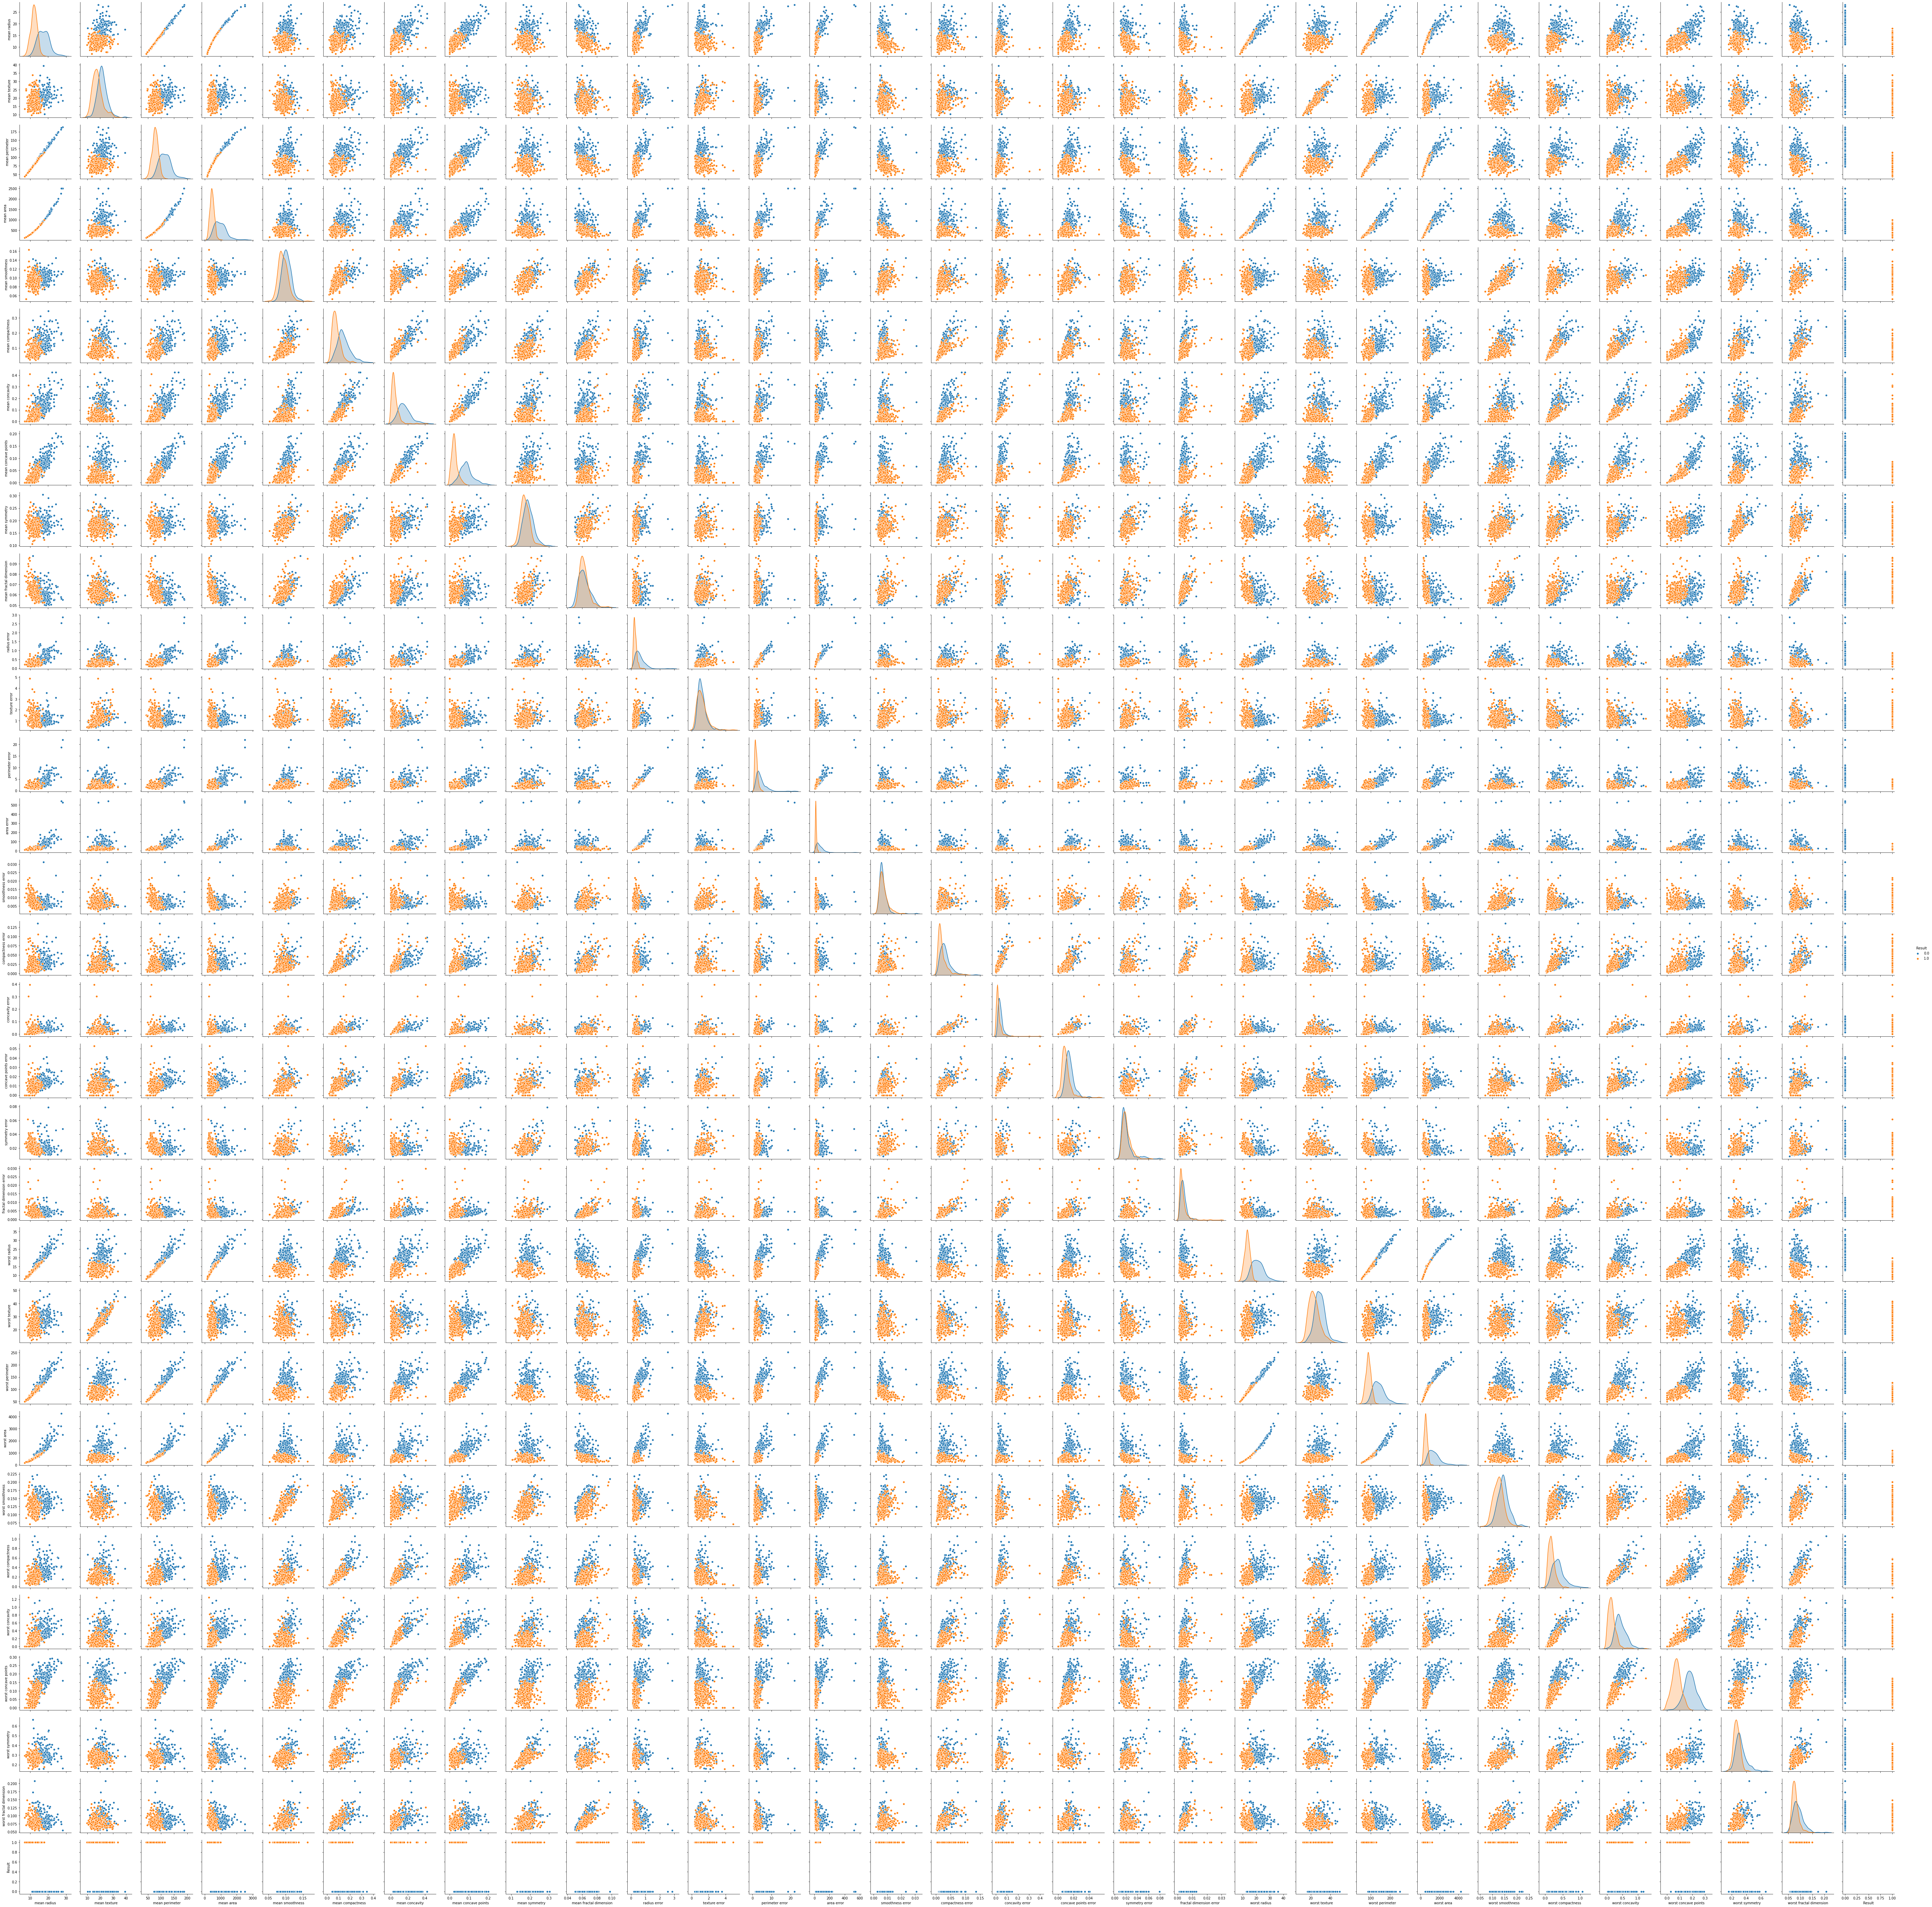

In [9]:
# This plot shows scatter plots between all columns in terms of bi-variate analysis

sns.pairplot(df3, hue="Result")

As we see, plot of all the features appears difficult to comprehend and very time consuming as well. So we will pick a few features which appear to show certain relation between the picked features.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

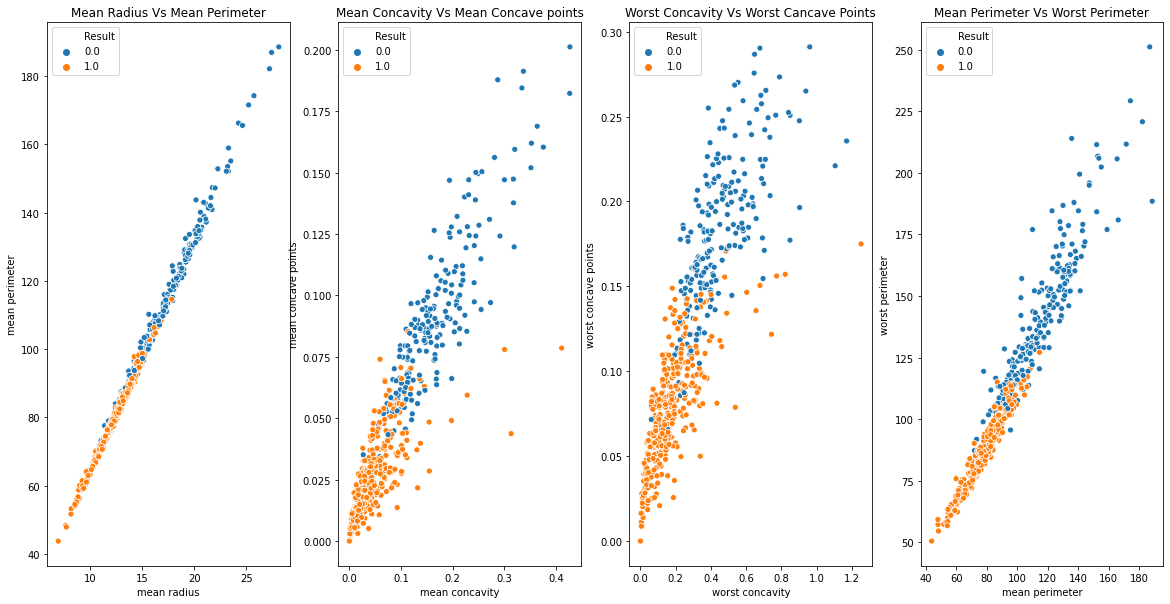

In [11]:
fig, (ax1,ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20,10))

ax1.set_title('Mean Radius Vs Mean Perimeter')
sns.scatterplot(x=df3['mean radius'], y=df3['mean perimeter'], data=df3, ax=ax1, hue="Result")

ax2.set_title('Mean Concavity Vs Mean Concave points')
sns.scatterplot(x=df3['mean concavity'], y=df3['mean concave points'], data=df3, ax=ax2,hue="Result")


ax3.set_title('Worst Concavity Vs Worst Cancave Points')
sns.scatterplot(x=df3['worst concavity'], y=df3['worst concave points'], data=df3, ax=ax3,hue="Result")


ax4.set_title('Mean Perimeter Vs Worst Perimeter')
sns.scatterplot(x=df3['mean perimeter'], y=df3['worst perimeter'], data=df3, ax=ax4,hue="Result")

From the above 4 plots we could see that the two features under consideration in every plot are positively corelated and exhibit a relation that is directly proportional. For example, with rise in value of mean radius there is a proportional rise in mean perimeter. From this we get an idea that these features exhibit similar behaviour.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

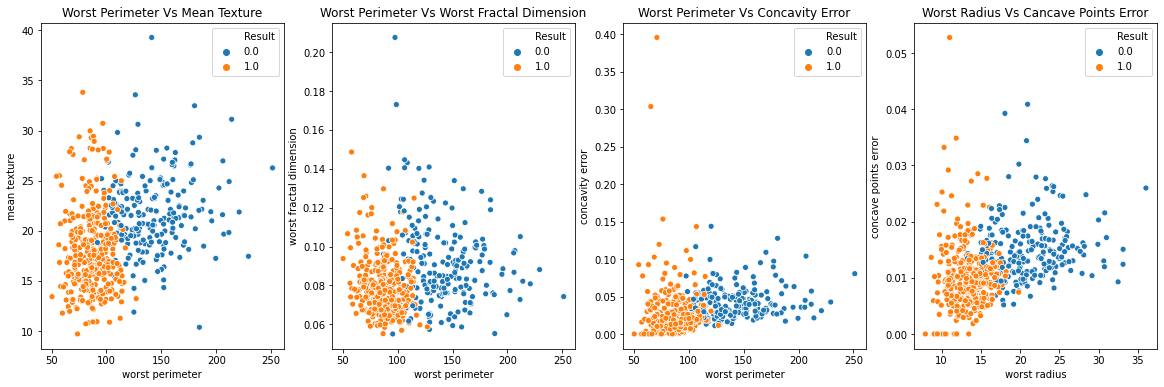

In [12]:
fig, (ax1,ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20,6))

ax1.set_title('Worst Perimeter Vs Mean Texture')
sns.scatterplot(x=df3['worst perimeter'], y=df3['mean texture'], data=df3, ax=ax1, hue="Result")

ax2.set_title('Worst Perimeter Vs Worst Fractal Dimension')
sns.scatterplot(x=df3['worst perimeter'], y=df3['worst fractal dimension'], data=df3, ax=ax2,hue="Result")


ax3.set_title('Worst Perimeter Vs Concavity Error')
sns.scatterplot(x=df3['worst perimeter'], y=df3['concavity error'], data=df3, ax=ax3,hue="Result")


ax4.set_title('Worst Radius Vs Cancave Points Error')
sns.scatterplot(x=df3['worst radius'], y=df3['concave points error'], data=df3, ax=ax4,hue="Result")

Here is another 2D scatter plot among a few features plotted against one another. Here we could see that there appears to be a distinction between benign and malignant cases. Just by observing the plots we can say with a great confidence that cases with mean texture beyond 10 and worst perimeter beyond 120 are malignant i.e. 0. Similar is the case for plot 2, 3 & 4. We can roughly draw a line to separate out benign from malignant.  

### 4. Make a boxplot for each feature and highlight the outlier, if any, then remove the outlier, make again box plot to show the outlier effect and write the inferences. [5]

<IPython.core.display.Javascript object>

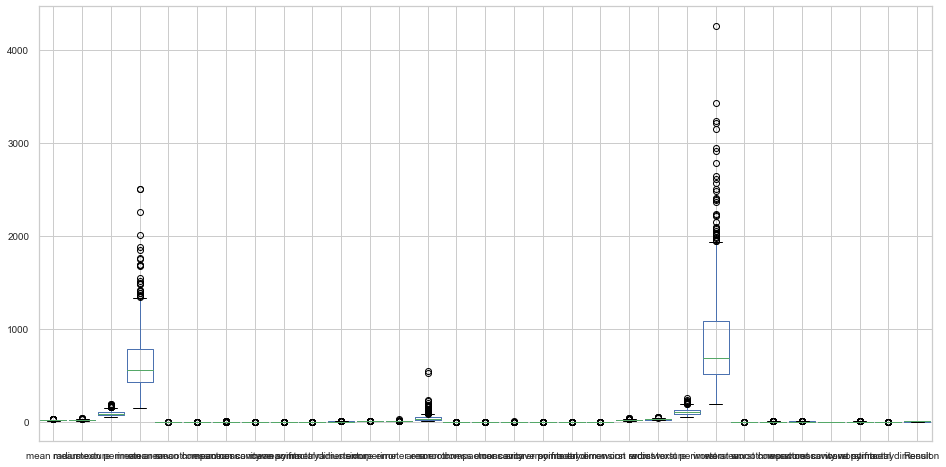

In [13]:
# To plot a set of boxplot on the entire dataframe

sns.set(rc={'figure.figsize':(16,8)}, font_scale=0.9, style='whitegrid')
df3.boxplot(widths = 0.9)

The above boxplot though gives us an overall picture, is not very readable. Hence we will need to plot the features one by one as follows.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>

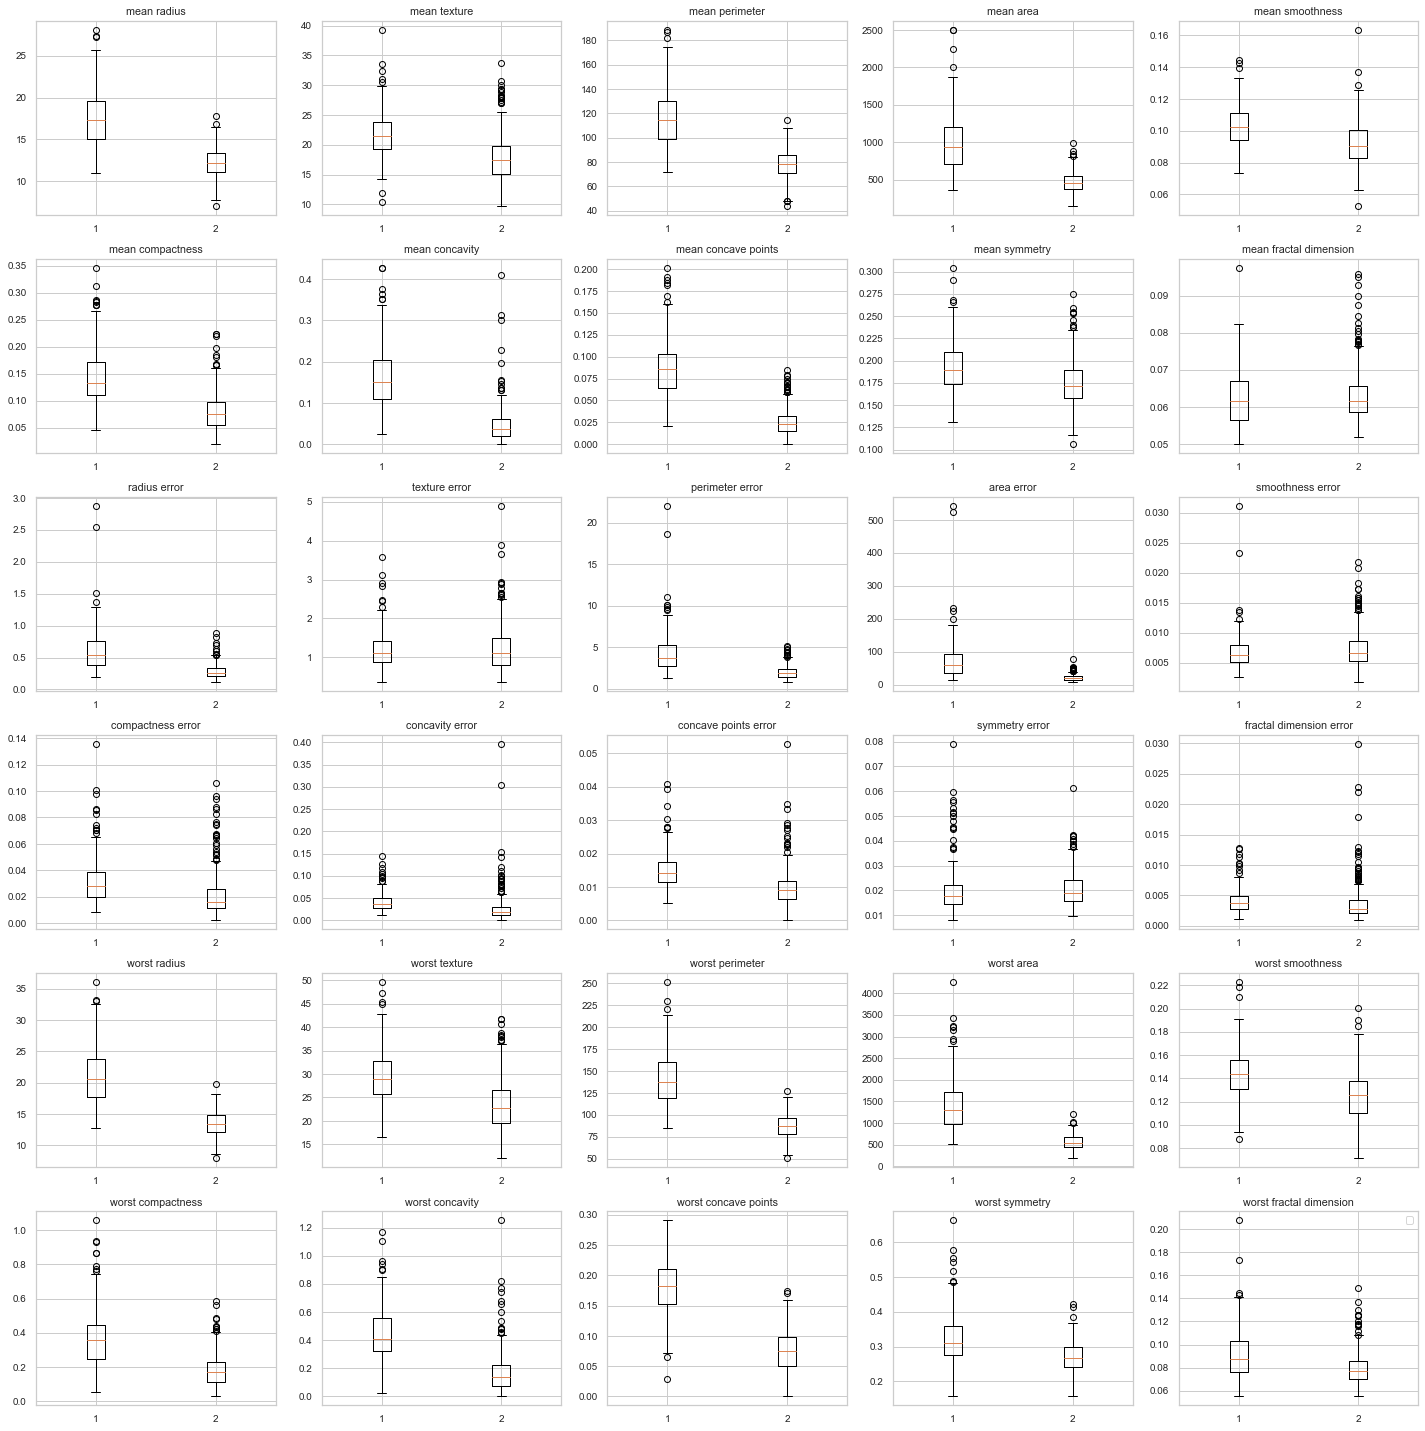

In [14]:
global new_df # declaring it as global so as to be able to 
              #use this var within local scopes of functions in future
new_df = df3.copy() # Making a copy of the original dataframe for ease

df_0 = new_df[new_df['Result'] == 0]
df_1 = new_df[new_df['Result'] == 1]
fig = plt.figure(figsize=(20,20))

#
for i,b in enumerate(list(new_df.columns[0:30])):
    
    i +=1
    ax = fig.add_subplot(6,5,i)
    ax.boxplot([df_0[b], df_1[b]])

    ax.set_title(b)

sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()

This plot above gives a nice distinct view of boxplots for all the features at hand. We could see there exists outliers in all the features. Hence we will attempt removing outiers in the further cells using IQR method.

Using IQR (Inter Quartile Range) method for outlier removal

In [15]:
def IQR_OutlierRemoval(new_df):  # Creating a function for outlier removal using IQR method
    Q1 = new_df.quantile(0.25)
    Q3 = new_df.quantile(0.75)
    IQR = Q3 - Q1

    new_df = new_df[~((new_df < (Q1 - 1.5 * IQR)) |(new_df > (Q3 + 1.5 * IQR))).any(axis=1)]

    return new_df


Shape of the dataframe before outlier removal:  (569, 31)
Shape of the dataframe after outlier removal:  (398, 31)


<IPython.core.display.Javascript object>

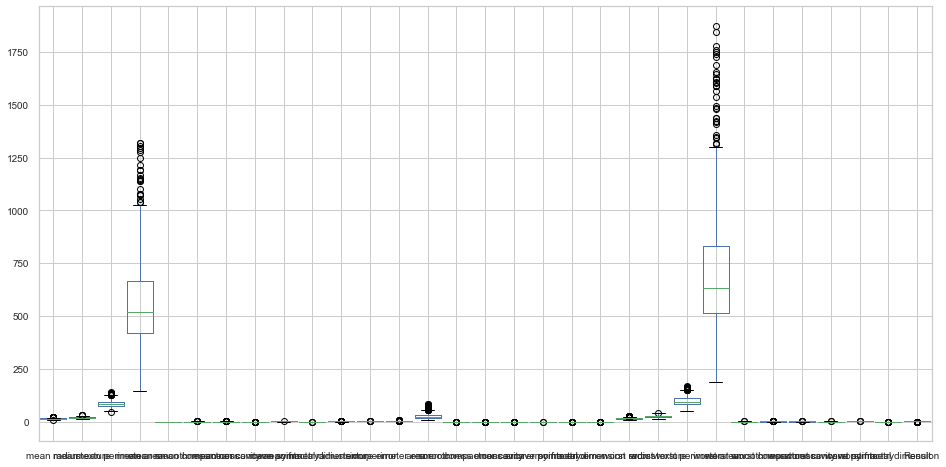

In [16]:
# Removing outliers using the function we created before

new_df = IQR_OutlierRemoval(new_df)

print("Shape of the dataframe before outlier removal: ", df3.shape)

print("Shape of the dataframe after outlier removal: ", new_df.shape)

# Plotting a set of boxplot over the entire dataset again post outlier removal

sns.set(rc={'figure.figsize':(16,8)}, font_scale=0.9, style='whitegrid')
new_df.boxplot(widths = 0.9)

We performed outlier removal using Inter Quartile Range method and plotted box plot before outlier removal as well as after outlier removal. We observed that post removing outliers, we end up with a reduces sized dataframe. From a size of 569 rows we arrive at a row size of 398.

This, given we dropped the outlier rows as we asked in the question, could be dealt with better, had we imputed the outlier values with median values of their respective feature columns. 

### 5. Normalized the data if required, and write a note for what, why and how you performed normalization.[5]

<IPython.core.display.Javascript object>

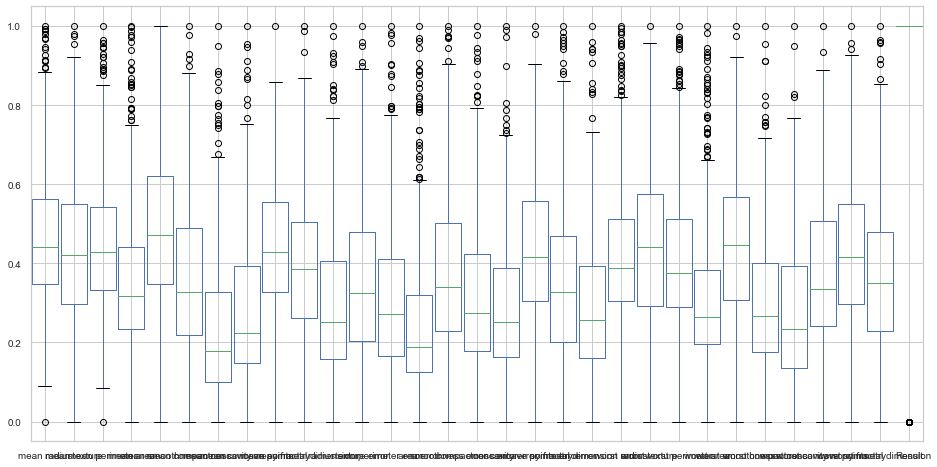

In [17]:
# Using MinMaxScaler to perform normalization
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(new_df) 
new_df.loc[:,:] = scaled_values

sns.set(rc={'figure.figsize':(16,8)}, font_scale=0.9, style='whitegrid')
new_df.boxplot(widths = 0.9)

As all the features are of varied ranges, we applied MinMaxScaler here to scale it within 0 & 1. This makes analysis easier as all features now appear to vary within the same range. 